In [14]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

In [2]:
tmobile_df=pd.read_csv('tmus.csv')
verizon_df=pd.read_csv('vz.csv')

No handles with labels found to put in legend.


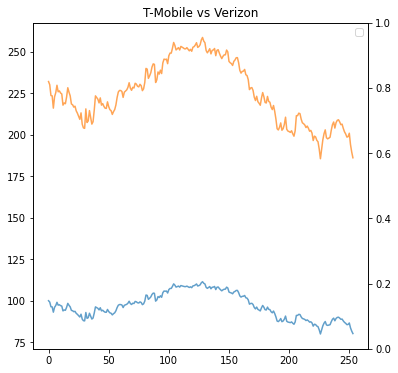

In [3]:
fig,ax=plt.subplots(figsize=(6,6))
tmobile_df['T-Mobile']=tmobile_df['Open'].div(tmobile_df['Open'].iloc[0]).mul(100)
tmobile_df['T-Mobile'].plot(ax=ax,alpha=.7,label="T-Mobile")
twin_ax=ax.twinx()
verizon_df['Verizon']=tmobile_df['Open'].div(verizon_df['Open'].iloc[0]).mul(100)
verizon_df['Verizon'].plot(ax=ax,alpha=.7,label="Verizon")
plt.title("T-Mobile vs Verizon")
plt.legend()
plt.show()


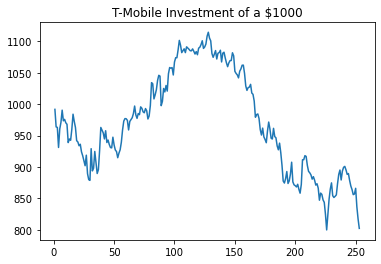

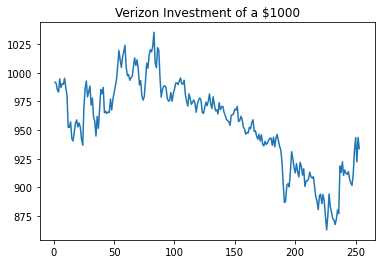

In [4]:
def return_calculate(df,investment,title):
    df_returns=df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    df_cumulative_return.mul(investment).plot()
    plt.title(title)
    plt.show()
    
return_calculate(tmobile_df,1000,"T-Mobile Investment of a $1000")
return_calculate(verizon_df,1000,"Verizon Investment of a $1000")


Text(0.5, 1.0, 'tmobile vs verizon growth trend')

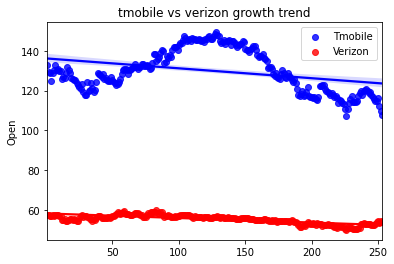

In [18]:
def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative

tmobile_accumulative=stock_price_by_pct_chg(tmobile_df)
verizon_accumulative=stock_price_by_pct_chg(verizon_df)

sns.regplot(x=np.asarray(tmobile_accumulative.index).astype(float),y=tmobile_accumulative,color='blue', label="Tmobile")
sns.regplot(x=np.asarray(verizon_accumulative.index).astype(float),y=verizon_accumulative,color='red',label="Verizon")
plt.legend()
plt.title("tmobile vs verizon growth trend")

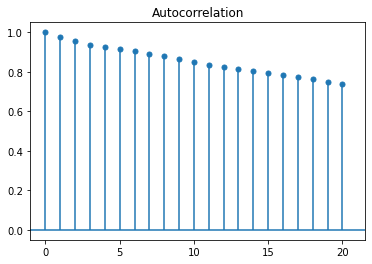

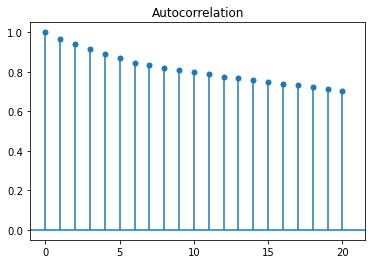

In [13]:


# Plot 1: AR parameter = +0.9
plot_acf(tmobile_df['Open'], alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(verizon_df['Open'], alpha=1, lags=20)
plt.show()

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index

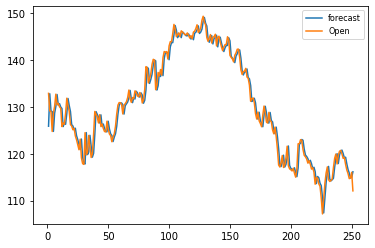

In [21]:
mod = ARMA(tmobile_accumulative.dropna(), order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end=250)
plt.legend(fontsize=8)
plt.show()

In [24]:
print(res.summary())
print(res.params[1])

                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  253
Model:                     ARMA(1, 0)   Log Likelihood                -510.222
Method:                       css-mle   S.D. of innovations              1.804
Date:                Tue, 11 Jan 2022   AIC                           1026.444
Time:                        21:09:23   BIC                           1037.044
Sample:                             0   HQIC                          1030.709
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.8668      7.990     15.754      0.000     110.208     141.526
ar.L1.Open     0.9888      0.009    113.603      0.000       0.972       1.006
                                    Roots           

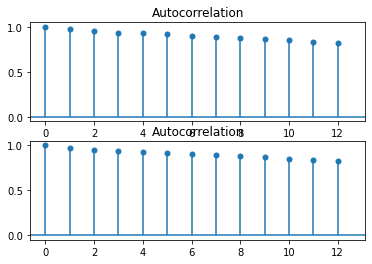

In [27]:
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(tmobile_df['T-Mobile'], alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(verizon_df['Verizon'], alpha=1, lags=12, ax=axes[1])